In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = sns.color_palette('deep'))

In [10]:
class SimpleNeuron:

    def __init__(self , n_inputs=2, weights = None , bias = None):
        if weights is None:
            self.weights = np.random.randn(n_inputs) * 0.01
        else:
            self.weights = weights
        
        if bias is None:
            self.bias = 0.0
        else: self.bias = bias

        print("Neuron initialized!")
        print("Weights: " , self.weights)
        print("Bias: " , self.bias)


    def sigmoid(self , z):
        return 1 / (1 + np.exp(-z))
    

    def process(self , inputs):

        z = np.dot(self.weights , inputs) + self.bias
        return self.sigmoid(z) , z
    

    def decide(self , inputs , threshold = 0.5):
        probability , z = self.process(inputs)
        decision = probability >= threshold
        return decision , probability , z

In [11]:
class TouchNeuron(SimpleNeuron):

    def __init__(self):
        weights = [-2.0 , 1.5]
        bias = 0.5
        super().__init__(2 , weights , bias)

        print("\n🧠 Touch Decision Neuron Configuration:")
        print("   Temperature weight: -2.0 (negative = avoid hot)")
        print("   Familiarity weight: 1.5 (positive = trust familiar)")
        print("   Bias: 0.5 (slightly cautious)")



    def should_i_touch(self , temperature , familiarity):

        inputs = np.array([temperature , familiarity])
        decision , probability , z = self.decide(inputs)

        print(f"\n📊 Analysis:")
        print(f"   Inputs: Temperature={temperature}, Familiarity={familiarity}")
        print(f"   Linear combination (z): {z:.3f}")
        print(f"   Probability of touching: {probability:.3f} ({probability*100:.1f}%)")

        if decision:
            return "✅ Safe to touch!", probability
        else:
            return "⚠️ Don't touch!", probability
        

touch_neuron = TouchNeuron()
# Test Case 1: Hot and Unknown
print("\n" + "-"*40)
print("Test 1: Hot Iron (hot & unknown)")
result, prob = touch_neuron.should_i_touch(temperature=0.9, familiarity=0.2)
print(f"Decision: {result}")

# Test Case 2: Cold and Familiar
print("\n" + "-"*40)
print("Test 2: Your Phone (cool & familiar)")
result, prob = touch_neuron.should_i_touch(temperature=0.3, familiarity=0.9)
print(f"Decision: {result}")

# Test Case 3: Warm and Semi-familiar
print("\n" + "-"*40)
print("Test 3: Coffee Mug (warm & semi-familiar)")
result, prob = touch_neuron.should_i_touch(temperature=0.6, familiarity=0.7)
print(f"Decision: {result}")

Neuron initialized!
Weights:  [-2.0, 1.5]
Bias:  0.5

🧠 Touch Decision Neuron Configuration:
   Temperature weight: -2.0 (negative = avoid hot)
   Familiarity weight: 1.5 (positive = trust familiar)
   Bias: 0.5 (slightly cautious)

----------------------------------------
Test 1: Hot Iron (hot & unknown)

📊 Analysis:
   Inputs: Temperature=0.9, Familiarity=0.2
   Linear combination (z): -1.000
   Probability of touching: 0.269 (26.9%)
Decision: ⚠️ Don't touch!

----------------------------------------
Test 2: Your Phone (cool & familiar)

📊 Analysis:
   Inputs: Temperature=0.3, Familiarity=0.9
   Linear combination (z): 1.250
   Probability of touching: 0.777 (77.7%)
Decision: ✅ Safe to touch!

----------------------------------------
Test 3: Coffee Mug (warm & semi-familiar)

📊 Analysis:
   Inputs: Temperature=0.6, Familiarity=0.7
   Linear combination (z): 0.350
   Probability of touching: 0.587 (58.7%)
Decision: ✅ Safe to touch!



📧 EXAMPLE 2: Spam Email Detection Neuron
Neuron initialized!
Weights:  [-0.00477069  0.01140698  0.00377589]
Bias:  0.0

🔍 Spam Detection Features:
   1. Has suspicious links (0-1)
   2. From known sender (0-1)
   3. Has urgency words (0-1)

📊 Spam Detection Results:

Suspicious email:
   Features: [0.9, 0.1, 0.8]
   Linear combination: 3.050
   Spam probability: 0.955 (95.5%)
   Classification: 🚫 SPAM

Normal email:
   Features: [0.2, 0.9, 0.1]
   Linear combination: -1.650
   Spam probability: 0.161 (16.1%)
   Classification: ✅ NOT SPAM

Borderline email:
   Features: [0.5, 0.5, 0.6]
   Linear combination: 1.050
   Spam probability: 0.741 (74.1%)
   Classification: 🚫 SPAM

📝 EXAMPLE 3: Manual Step-by-Step Calculation
Neuron initialized!
Weights:  [0.5, 0.3]
Bias:  -0.1

📥 Inputs: x1=2.0, x2=3.0
⚙️ Weights: w1=0.5, w2=0.3
📍 Bias: b=-0.1

🔢 Step-by-Step Calculation:
   Step 1: Calculate weighted sum
          z = w1*x1 + w2*x2 + b
          z = 0.5*2.0 + 0.3*3.0 + -0.1
          z = 1

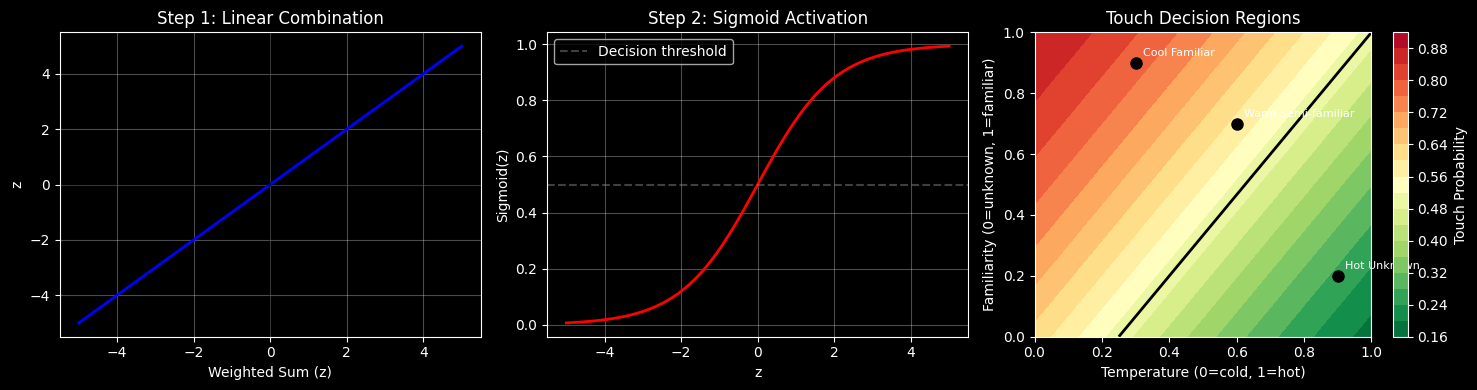


✅ Complete! The neuron is the building block of neural networks.
   Multiple neurons together = Neural Network! 🧠


In [12]:
# ============================================
# EXAMPLE 2: Generic Binary Classification
# ============================================
print("\n" + "="*60)
print("📧 EXAMPLE 2: Spam Email Detection Neuron")
print("="*60)

# Create a spam detection neuron
spam_neuron = SimpleNeuron(n_inputs=3)  # 3 features for spam detection

# Manually set weights (as if trained)
spam_neuron.weights = np.array([2.0, -1.5, 3.0])  # [has_links, from_known, has_urgency]
spam_neuron.bias = -1.0

print("\n🔍 Spam Detection Features:")
print("   1. Has suspicious links (0-1)")
print("   2. From known sender (0-1)")
print("   3. Has urgency words (0-1)")

# Test emails
test_emails = [
    ("Suspicious email", [0.9, 0.1, 0.8]),  # Many links, unknown sender, urgent
    ("Normal email", [0.2, 0.9, 0.1]),      # Few links, known sender, not urgent
    ("Borderline email", [0.5, 0.5, 0.6])   # Some links, semi-known, somewhat urgent
]

print("\n📊 Spam Detection Results:")
for name, features in test_emails:
    _, prob, z = spam_neuron.decide(features)
    is_spam = "🚫 SPAM" if prob > 0.5 else "✅ NOT SPAM"
    print(f"\n{name}:")
    print(f"   Features: {features}")
    print(f"   Linear combination: {z:.3f}")
    print(f"   Spam probability: {prob:.3f} ({prob*100:.1f}%)")
    print(f"   Classification: {is_spam}")


# ============================================
# EXAMPLE 3: Step-by-Step Calculation
# ============================================
print("\n" + "="*60)
print("📝 EXAMPLE 3: Manual Step-by-Step Calculation")
print("="*60)

# Create a simple neuron with known weights
demo_neuron = SimpleNeuron(n_inputs=2, weights=[0.5, 0.3], bias=-0.1)

# Input values
x1, x2 = 2.0, 3.0

print(f"\n📥 Inputs: x1={x1}, x2={x2}")
print(f"⚙️ Weights: w1={demo_neuron.weights[0]}, w2={demo_neuron.weights[1]}")
print(f"📍 Bias: b={demo_neuron.bias}")

# Manual calculation
print("\n🔢 Step-by-Step Calculation:")
print(f"   Step 1: Calculate weighted sum")
print(f"          z = w1*x1 + w2*x2 + b")
print(f"          z = {demo_neuron.weights[0]}*{x1} + {demo_neuron.weights[1]}*{x2} + {demo_neuron.bias}")
print(f"          z = {demo_neuron.weights[0]*x1} + {demo_neuron.weights[1]*x2} + {demo_neuron.bias}")
z_manual = demo_neuron.weights[0]*x1 + demo_neuron.weights[1]*x2 + demo_neuron.bias
print(f"          z = {z_manual}")

print(f"\n   Step 2: Apply sigmoid activation")
print(f"          output = 1 / (1 + e^(-z))")
print(f"          output = 1 / (1 + e^(-{z_manual}))")
print(f"          output = 1 / (1 + {np.exp(-z_manual):.4f})")
output_manual = 1 / (1 + np.exp(-z_manual))
print(f"          output = {output_manual:.4f}")

# Verify with neuron's process method
output_auto, z_auto = demo_neuron.process([x1, x2])
print(f"\n✅ Verification using neuron.process():")
print(f"   Output: {output_auto:.4f}")
print(f"   Match: {np.isclose(output_manual, output_auto)}")


# ============================================
# VISUALIZATION
# ============================================
print("\n" + "="*60)
print("📊 BONUS: Visualizing Neuron Behavior")
print("="*60)

import matplotlib.pyplot as plt

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Linear combination (z values)
z_values = np.linspace(-5, 5, 100)
axes[0].plot(z_values, z_values, 'b-', linewidth=2)
axes[0].set_title('Step 1: Linear Combination')
axes[0].set_xlabel('Weighted Sum (z)')
axes[0].set_ylabel('z')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Plot 2: Sigmoid activation
sigmoid_values = 1 / (1 + np.exp(-z_values))
axes[1].plot(z_values, sigmoid_values, 'r-', linewidth=2)
axes[1].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Decision threshold')
axes[1].set_title('Step 2: Sigmoid Activation')
axes[1].set_xlabel('z')
axes[1].set_ylabel('Sigmoid(z)')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Plot 3: Decision regions for touch neuron
temp_range = np.linspace(0, 1, 50)
fam_range = np.linspace(0, 1, 50)
temp_grid, fam_grid = np.meshgrid(temp_range, fam_range)

touch_neuron_viz = TouchNeuron()
decisions = np.zeros_like(temp_grid)

for i in range(len(temp_range)):
    for j in range(len(fam_range)):
        _, prob, _ = touch_neuron_viz.decide([temp_grid[i,j], fam_grid[i,j]])
        decisions[i,j] = prob

contour = axes[2].contourf(temp_grid, fam_grid, decisions, levels=20, cmap='RdYlGn_r')
axes[2].contour(temp_grid, fam_grid, decisions, levels=[0.5], colors='black', linewidths=2)
axes[2].set_title('Touch Decision Regions')
axes[2].set_xlabel('Temperature (0=cold, 1=hot)')
axes[2].set_ylabel('Familiarity (0=unknown, 1=familiar)')
plt.colorbar(contour, ax=axes[2], label='Touch Probability')

# Add example points
examples = [
    (0.9, 0.2, 'Hot Unknown'),
    (0.3, 0.9, 'Cool Familiar'),
    (0.6, 0.7, 'Warm Semi-familiar')
]
for temp, fam, label in examples:
    axes[2].plot(temp, fam, 'ko', markersize=8)
    axes[2].annotate(label, (temp, fam), xytext=(5, 5),
                    textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

print("\n✅ Complete! The neuron is the building block of neural networks.")
print("   Multiple neurons together = Neural Network! 🧠")

In [ ]:
def softmax(zs):
    s = np.sum(np.exp(z))
    return [np.exp(zi)/s for zi in z]